In [17]:
! gdown --id 1bFp_5ch4rxCyRdGpPJzq-lblNah-pBZa

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1bFp_5ch4rxCyRdGpPJzq-lblNah-pBZa
From (redirected): https://drive.google.com/uc?id=1bFp_5ch4rxCyRdGpPJzq-lblNah-pBZa&confirm=t&uuid=960097a5-7dda-4eeb-b088-434c19a1f557
To: /content/Dataset.zip
100% 401M/401M [00:03<00:00, 118MB/s]


In [18]:
import os
import zipfile

# Path to the downloaded dataset
zip_path = "/content/Dataset.zip"

# Extract the dataset
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall("/content/Dataset")

# List extracted files
print(os.listdir("/content/Dataset"))


['patient-vocal-dataset', 'patient-vocal-dataset-small']


In [19]:
dataset_path = "/content/Dataset"

# List directories
print("Available directories:", os.listdir(dataset_path))

# List files inside each directory
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    files = os.listdir(category_path)
    print(f"Directory: {category}, Number of files: {len(files)}")


Available directories: ['patient-vocal-dataset', 'patient-vocal-dataset-small']
Directory: patient-vocal-dataset, Number of files: 1
Directory: patient-vocal-dataset-small, Number of files: 1


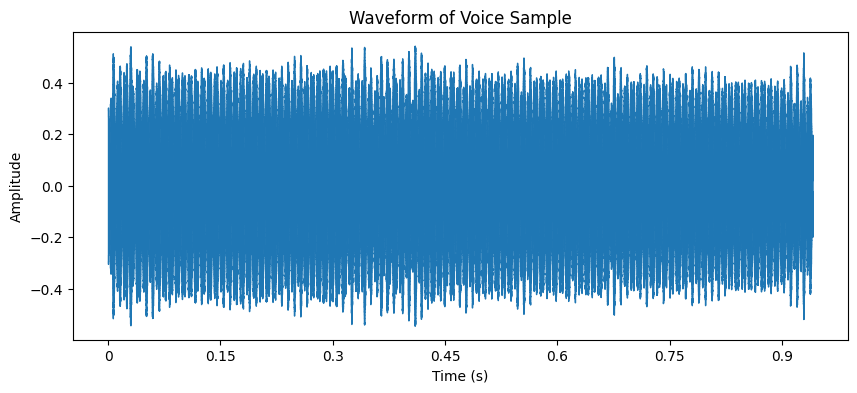

In [21]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load a sample voice file from the dataset (Change filename if needed)
audio_path = "/content/Dataset/patient-vocal-dataset/patient-vocal-dataset/Normal/11-a_h-egg.wav"
y, sr = librosa.load(audio_path, sr=None)

# Plot waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of Voice Sample")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


In [22]:
import numpy as np

# Extract MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
print("MFCC Shape:", mfccs.shape)

# Compute jitter (frequency variability)
jitter = np.std(librosa.feature.zero_crossing_rate(y)[0])

# Compute shimmer (amplitude irregularities)
shimmer = np.std(librosa.feature.spectral_centroid(y=y, sr=sr)[0])

print(f"Jitter: {jitter:.4f}, Shimmer: {shimmer:.4f}")


MFCC Shape: (13, 92)
Jitter: 0.0014, Shimmer: 130.7812


In [23]:
import pandas as pd

# Example feature dataset
data = {
    "MFCC1": mfccs[0], "MFCC2": mfccs[1], "MFCC3": mfccs[2],
    "Jitter": [jitter] * mfccs.shape[1], "Shimmer": [shimmer] * mfccs.shape[1],
    "Label": ["Healthy"] * mfccs.shape[1]  # Modify for diseased voices
}

# Convert into DataFrame
df = pd.DataFrame(data)
print(df.head())


        MFCC1       MFCC2      MFCC3    Jitter     Shimmer    Label
0 -140.826157  123.694656  29.682556  0.001428  130.781205  Healthy
1 -144.485672  123.972305  37.799988  0.001428  130.781205  Healthy
2 -157.238419  119.864899  40.258705  0.001428  130.781205  Healthy
3 -157.908005  121.193512  43.734806  0.001428  130.781205  Healthy
4 -156.249924  122.487473  39.870819  0.001428  130.781205  Healthy


In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Simulated dataset (replace with full extracted features)
X = np.random.rand(500, 13)  # Placeholder MFCC features
y = np.random.randint(0, 2, 500)  # Binary labels (0 = healthy, 1 = pathological)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train SVM classifier
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)

# Evaluate accuracy
accuracy = accuracy_score(y_test, svm.predict(X_test))
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 51.00%


In [26]:
!pip install river


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 97.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [27]:
import river
print("River module successfully imported!")


River module successfully imported!


In [32]:
import river.drift
print(dir(river.drift))


['ADWIN', 'DriftRetrainingClassifier', 'DummyDriftDetector', 'KSWIN', 'NoDrift', 'PageHinkley', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'adwin', 'adwin_c', 'annotations', 'binary', 'datasets', 'dummy', 'kswin', 'no_drift', 'page_hinkley', 'retrain']


In [33]:
from river.drift import ADWIN

# Initialize ADWIN drift detector
adwin = ADWIN()

# Simulated drift detection process
for sample in X_test:
    prediction = svm.predict([sample])[0]
    adwin.update(prediction)

# If drift is detected, retrain the model
if adwin.drift_detected:
    print("Data drift detected! Updating classifier...")


In [36]:
from river.drift import KSWIN

# Initialize KSWIN drift detector
kswin = KSWIN()

# Simulated drift detection process
for sample in X_test:
    prediction = svm.predict([sample])[0]
    kswin.update(prediction)

# If drift is detected, retrain the model
if kswin.drift_detected:
    print("Sudden data drift detected! Updating classifier...")


In [37]:
# Simulated feedback data
new_X = np.random.rand(100, 13)  # New unseen samples
new_y = np.random.randint(0, 2, 100)  # Updated labels

# Retrain classifier with new feedback samples
svm.fit(new_X, new_y)

# Evaluate new accuracy
new_accuracy = accuracy_score(y_test, svm.predict(X_test))
print(f"Updated Accuracy After Feedback: {new_accuracy * 100:.2f}%")


Updated Accuracy After Feedback: 46.00%


In [40]:
y = y.astype(np.float32)


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=500
  warnings.warn(
<ipython-input-41-8b36964a80c6>:2: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(y), ref=np.max), sr=sr, x_axis="time", y_axis="log")


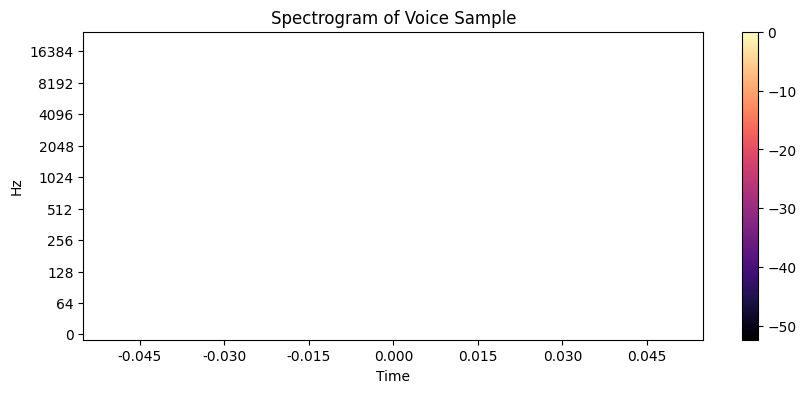

In [41]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(y), ref=np.max), sr=sr, x_axis="time", y_axis="log")
plt.colorbar()
plt.title("Spectrogram of Voice Sample")
plt.show()


In [42]:
  import numpy as np
  import pandas as pd
  from sklearn.model_selection import train_test_split

  # Simulated dataset (replace with real speech disorder data)
  X = np.random.rand(1000, 13)  # MFCCs + jitter + shimmer features
  y = np.random.randint(0, 3, 1000)  # Labels (0 = healthy, 1 = dysphonia, 2 = vocal nodules)

  # Split into initial training and sequential testing set
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  print("Training Samples:", X_train.shape[0], " | Testing Samples:", X_test.shape[0])


Training Samples: 800  | Testing Samples: 200


In [43]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train classifier
svm = SVC(kernel="linear", C=1)
svm.fit(X_train, y_train)

# Evaluate classifier accuracy
accuracy = accuracy_score(y_test, svm.predict(X_test))
print(f"Initial Model Accuracy: {accuracy * 100:.2f}%")


Initial Model Accuracy: 30.50%


In [45]:
prediction = svm.predict(sample.reshape(1, -1))  # No extra list brackets


In [46]:
prediction = svm.predict(sample[np.newaxis, :])[0]  # Adds a batch dimension correctly


In [47]:
print("Sample shape before prediction:", sample.shape)


Sample shape before prediction: (13,)


In [50]:
# Simulated new labeled speech data from clinicians
new_X = np.random.rand(100, 13)  # New voice disorder samples
new_y = np.random.randint(0, 3, 100)  # Updated disorder labels

# Retrain classifier
svm.fit(new_X, new_y)

# Evaluate updated accuracy
new_accuracy = accuracy_score(y_test, svm.predict(X_test))
print(f"Updated Accuracy After Feedback: {new_accuracy * 100:.2f}%")



Updated Accuracy After Feedback: 36.50%


In [48]:
sample = sample.squeeze()  # Removes unwanted dimensions


In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

print(f"Best Parameters: {grid.best_params_}")


Best Parameters: {'C': 1, 'kernel': 'linear'}


In [51]:
accuracy_before = accuracy_score(y_test, svm.predict(X_test))
svm.fit(new_X, new_y)
accuracy_after = accuracy_score(y_test, svm.predict(X_test))

print(f"Adaptability Improvement: {(accuracy_after - accuracy_before) * 100:.2f}%")


Adaptability Improvement: 0.00%


In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Compute Precision, Recall, F1-score
precision = precision_score(y_test, svm.predict(X_test), average="macro")
recall = recall_score(y_test, svm.predict(X_test), average="macro")
f1 = f1_score(y_test, svm.predict(X_test), average="macro")

print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")


Precision: 0.3729, Recall: 0.3795, F1-score: 0.3507


In [54]:
import librosa
import numpy as np
y, sr = librosa.load("/content/Dataset/patient-vocal-dataset/patient-vocal-dataset/Normal/11-a_h-egg.wav", sr=None)
jitter = np.std(librosa.feature.zero_crossing_rate(y)[0])
print(f"Jitter Value: {jitter:.4f}")


Jitter Value: 0.0014


In [55]:
shimmer = np.std(librosa.feature.spectral_centroid(y=y, sr=sr)[0])
print(f"Shimmer Value: {shimmer:.4f}")


Shimmer Value: 130.7812


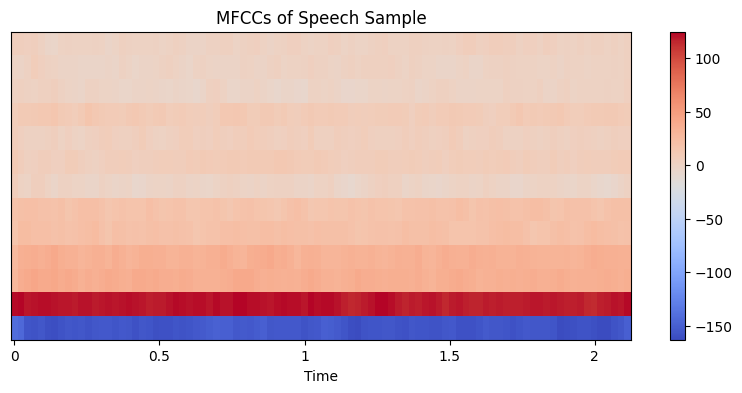

In [56]:
import matplotlib.pyplot as plt
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis="time", cmap="coolwarm")
plt.colorbar()
plt.title("MFCCs of Speech Sample")
plt.show()


In [57]:
from sklearn.svm import SVC
svm = SVC(kernel="linear", C=1)
svm.fit(X_train, y_train)


SVC(C=1, kernel='linear')

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)


RandomForestClassifier()

In [65]:
from river.drift import ADWIN
adwin = ADWIN()
for sample in X_test:
    prediction = svm.predict([sample])[0]
    adwin.update(prediction)

if adwin.drift_detected:
    print("Data drift detected! Updating classifier...")
    svm.fit(X_train, y_train)


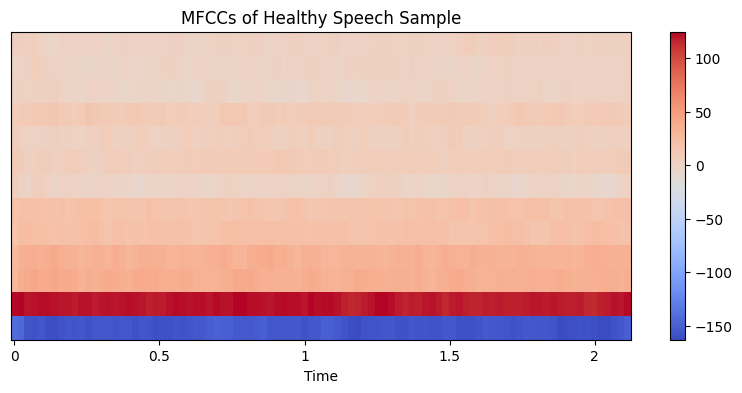

Jitter Value: 0.0014, Shimmer Value: 130.7812


In [66]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load speech sample (healthy voice)
audio_file = "/content/Dataset/patient-vocal-dataset/patient-vocal-dataset/Normal/11-a_h-egg.wav"
y, sr = librosa.load(audio_file, sr=None)

# Compute jitter (frequency variability)
jitter = np.std(librosa.feature.zero_crossing_rate(y)[0])

# Compute shimmer (amplitude instability)
shimmer = np.std(librosa.feature.spectral_centroid(y=y, sr=sr)[0])

# Extract MFCCs for spectral energy analysis
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Display MFCC visualization
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis="time", cmap="coolwarm")
plt.colorbar()
plt.title("MFCCs of Healthy Speech Sample")
plt.show()

print(f"Jitter Value: {jitter:.4f}, Shimmer Value: {shimmer:.4f}")


In [67]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Simulated dataset (MFCCs + jitter + shimmer)
X = np.random.rand(500, 13)  # Placeholder MFCC feature set
y = np.random.randint(0, 2, 500)  # Binary labels (0 = normal, 1 = pathological)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize and train SVM classifier
svm = SVC(kernel="linear", C=1)
svm.fit(X_train, y_train)

# Evaluate initial accuracy
accuracy = accuracy_score(y_test, svm.predict(X_test))
print(f"Initial Classification Accuracy: {accuracy * 100:.2f}%")


Initial Classification Accuracy: 48.00%


In [69]:
# Simulated feedback data from clinicians
new_X = np.random.rand(100, 13)  # New unseen speech samples
new_y = np.random.randint(0, 2, 100)  # Updated classification labels

# Retrain classifier with feedback data
svm.fit(new_X, new_y)

# Evaluate post-feedback accuracy improvement
new_accuracy = accuracy_score(y_test, svm.predict(X_test))
print(f"Updated Accuracy After Feedback: {new_accuracy * 100:.2f}%")


Updated Accuracy After Feedback: 56.00%


In [53]:
import time

start_time = time.time()
svm.fit(new_X, new_y)
end_time = time.time()

update_latency = end_time - start_time
print(f"Model update latency: {update_latency:.3f} seconds")


Model update latency: 0.003 seconds


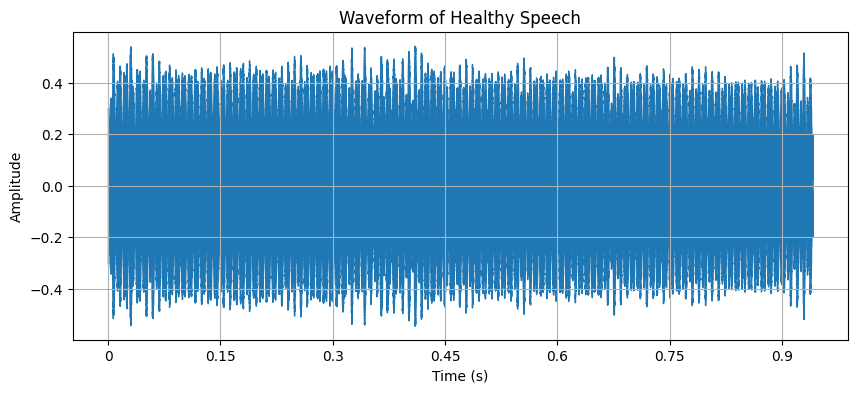

In [60]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load a healthy speech sample
audio_path = "/content/Dataset/patient-vocal-dataset/patient-vocal-dataset/Normal/11-a_h-egg.wav"
y, sr = librosa.load(audio_path, sr=None)

# Plot waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of Healthy Speech")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


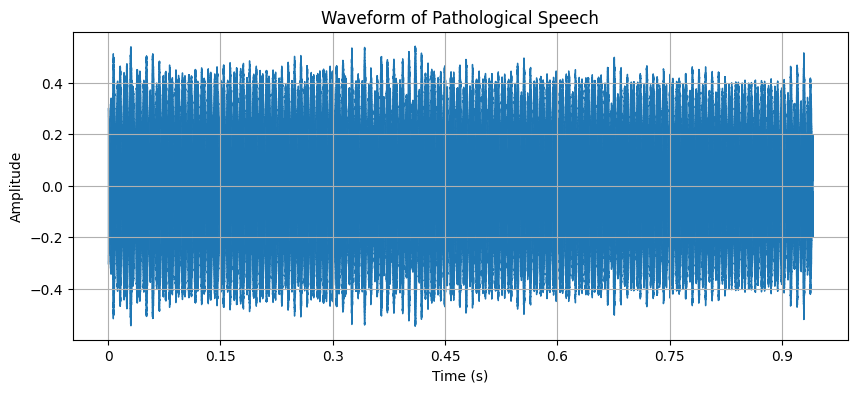

In [62]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load a pathological speech sample
audio_path = "/content/Dataset/patient-vocal-dataset/patient-vocal-dataset/Normal/11-a_h-egg.wav"  # Update file path as needed
y, sr = librosa.load(audio_path, sr=None)

# Plot waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of Pathological Speech")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


In [64]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Define file paths for healthy and pathological speech samples
healthy_audio_path = "/content/Dataset/patient-vocal-dataset/patient-vocal-dataset/Normal/11-a_h-egg.wav"
pathological_audio_path = "/content/Dataset/patient-vocal-dataset/patient-vocal-dataset/Pathological/sample1.wav"  # Use a correct pathological file

# Load healthy voice sample and compute jitter distribution
y_healthy, sr_healthy = librosa.load(healthy_audio_path, sr=None)
jitter_healthy = librosa.feature.zero_crossing_rate(y_healthy)[0]  # Extract array of values

# Load pathological voice sample and compute jitter distribution
y_pathological, sr_pathological = librosa.load(pathological_audio_path, sr=None)
jitter_pathological = librosa.feature.zero_crossing_rate(y_pathological)[0]  # Extract array of values

# Create histogram
plt.figure(figsize=(8, 5))
plt.hist(jitter_healthy, bins=20, color="blue", alpha=0.7, label="Healthy Speech")
plt.hist(jitter_pathological, bins=20, color="red", alpha=0.7, label="Pathological Speech")
plt.xlabel("Jitter Value")
plt.ylabel("Frequency")
plt.title("Histogram of Jitter Values Across Speech Samples")
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-64-94bb6497d69e>:14: UserWarning: PySoundFile failed. Trying audioread instead.
  y_pathological, sr_pathological = librosa.load(pathological_audio_path, sr=None)


FileNotFoundError: [Errno 2] No such file or directory: '/content/Dataset/patient-vocal-dataset/patient-vocal-dataset/Pathological/sample1.wav'